In [1]:
# Library untuk dataframe dan visualisasi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
# Import library untuk Clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from matplotlib.cm import cmaps_listed
# Import library untuk Evaluasi DBI
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import pairwise_distances


# **Tahap Pemahaman Data**

## **1. Mendeskripsikan Data**

In [2]:
 # Menampilkan dataset toko Melody Beauty
df_raw = pd.read_csv('Data2.csv')
df_raw.head()

,Nomer Transaksi,Tanggal Transaksi,Nomor Produk,Nama Produk,Variasi,Kategori Produk,Volume Penjualan,Harga Jual,Total Pembayaran
0,576908083372329249,04/01/2023 17:14:46,1729385949253040000,ECER day cream/ toner/ Night Cream Ms Glow,Malam Whitening,Skin Care Kits,2,IDR 68.000,IDR 202.342
1,576908083372329249,04/01/2023 17:14:46,1729432170961210000,OBRAL CREAM MALAM MS GLOW NON BARCODE,CM ultimate,Moisturisers & Mists\t,1,IDR 60.000,IDR 202.342
2,576908049686170146,02/01/2023 14:44:58,1729532317799910220,[Reseller] Serum Ms Glow Luminous/Acne/whiteni...,Serum White cell DNA mini MS GLOW,Serums & Essences\t,1,IDR 38.000,IDR 43.376
3,576907937339312178,02/01/2023 12:56:56,1729543731428100940,SEMUA PRODUK OBRAL MS GLOW Semua Jenis Kulit,FACIAL COWOK OBRAL,Skin Care Kits,1,IDR 45.500,IDR 45.500
4,576907933997959179,02/01/2023 16:40:05,1729568918565325644,SEMUA PRODUK OBRAL MS GLOW Semua Jenis Kulit,Moisturizer Yuzu,Skin Care Kits,1,IDR 87.500,IDR 87.500


## **2. Memilih data dengan pivot**

In [3]:
# Menambahkan kolom baru
table = pd.pivot_table(df_raw,
                       index=["Nomor Produk"],
                       values=["Volume Penjualan","Nomer Transaksi"],
                       aggfunc= ["sum","count"]
)
table

sum                            count  \
                         Nomer Transaksi Volume Penjualan Nomer Transaksi   
Nomor Produk                                                                
1729383505215391564     9463465835052543               32              32   
1729383505215457100  5767343042792614774               11              10   
1729383505215522636  2306562702833164874                4               4   
1729383505215588172 -3451634625379959528               26              26   
1729383514305627980  1152985754002920640                2               2   
...                                  ...              ...             ...   
1729576173693668172   576880601546131694                1               1   
1729577164510956364  1153805801616905195                2               2   
1729577227370793804   576889491162368238                1               1   
1729577388495040000   576907141845649498                1               1   
1729577624722836300   576892824018652153                1               1   

                                      
                    Volume Penjualan  
Nomor Produk                          
1729383505215391564               32  
1729383505215457100               10  
1729383505215522636                4  
1729383505215588172               26  
1729383514305627980                2  
...                              ...  
1729576173693668172                1  
1729577164510956364                2  
1729577227370793804                1  
1729577388495040000                1  
1729577624722836300                1  

[921 rows x 4 columns]

In [4]:
# Menambah kolom baru
table = table.reset_index()
table

Nomor Produk                  sum                   \
                              Nomer Transaksi Volume Penjualan   
0    1729383505215391564     9463465835052543               32   
1    1729383505215457100  5767343042792614774               11   
2    1729383505215522636  2306562702833164874                4   
3    1729383505215588172 -3451634625379959528               26   
4    1729383514305627980  1152985754002920640                2   
..                   ...                  ...              ...   
916  1729576173693668172   576880601546131694                1   
917  1729577164510956364  1153805801616905195                2   
918  1729577227370793804   576889491162368238                1   
919  1729577388495040000   576907141845649498                1   
920  1729577624722836300   576892824018652153                1   

              count                   
    Nomer Transaksi Volume Penjualan  
0                32               32  
1                10               10  
2                 4                4  
3                26               26  
4                 2                2  
..              ...              ...  
916               1                1  
917               2                2  
918               1                1  
919               1                1  
920               1                1  

[921 rows x 5 columns]

In [5]:
#cek nama kolom
table.columns

MultiIndex([('Nomor Produk',                 ''),
            (         'sum',  'Nomer Transaksi'),
            (         'sum', 'Volume Penjualan'),
            (       'count',  'Nomer Transaksi'),
            (       'count', 'Volume Penjualan')],
           )

# **Tahapan Persiapan Data**




## **1. Menentukan Atribut**

In [6]:
#membuat data frame 
df = pd.DataFrame()
df['Nomor Produk'] = table[('Nomor Produk', '')]
df['Volume Penjualan'] = table[('sum', 'Volume Penjualan')]
df['Jumlah Transaksi'] = table[('count', 'Nomer Transaksi')]
df

,Nomor Produk,Volume Penjualan,Jumlah Transaksi
0,1729383505215391564,32,32
1,1729383505215457100,11,10
2,1729383505215522636,4,4
3,1729383505215588172,26,26
4,1729383514305627980,2,2
...,...,...,...
916,1729576173693668172,1,1
917,1729577164510956364,2,2
918,1729577227370793804,1,1
919,1729577388495040000,1,1


## **2. Membersihkan Data**

### **A. Cek Data Kosong**

In [7]:
# cek data null
df.isnull().sum()

Nomor Produk        0
Volume Penjualan    0
Jumlah Transaksi    0
dtype: int64

### **B. Cek Data Duplikat**

In [8]:
# cek data duplikat
df.duplicated().sum()

0

## **3. Menentukan nilai pada kolom rata-rata**

In [9]:
#menambah tabel untuk rata-rata penjualan
df['Rata Rata'] = round(df['Volume Penjualan'] / df['Jumlah Transaksi'])
df['Rata Rata'] = df['Rata Rata'].astype('int')
df

,Nomor Produk,Volume Penjualan,Jumlah Transaksi,Rata Rata
0,1729383505215391564,32,32,1
1,1729383505215457100,11,10,1
2,1729383505215522636,4,4,1
3,1729383505215588172,26,26,1
4,1729383514305627980,2,2,1
...,...,...,...,...
916,1729576173693668172,1,1,1
917,1729577164510956364,2,2,1
918,1729577227370793804,1,1,1
919,1729577388495040000,1,1,1


## **4. Deteksi Outlier**

In [10]:
# Hitung IQR untuk var1, var2, dan var3
Q1_var1 = df['Volume Penjualan'].quantile(0.25)
Q3_var1 = df['Volume Penjualan'].quantile(0.75)
IQR_var1 = Q3_var1 - Q1_var1

Q1_var2 = df['Jumlah Transaksi'].quantile(0.25)
Q3_var2 = df['Jumlah Transaksi'].quantile(0.75)
IQR_var2 = Q3_var2 - Q1_var2

Q1_var3 = df['Rata Rata'].quantile(0.25)
Q3_var3 = df['Rata Rata'].quantile(0.75)
IQR_var3 = Q3_var3 - Q1_var3

In [11]:
# Hitung batas bawah dan batas atas untuk var1, var2, dan var3
lower_bound_var1 = Q1_var1 - 1.5 * IQR_var1
upper_bound_var1 = Q3_var1 + 1.5 * IQR_var1

lower_bound_var2 = Q1_var2 - 1.5 * IQR_var2
upper_bound_var2 = Q3_var2 + 1.5 * IQR_var2

lower_bound_var3 = Q1_var3 - 1.5 * IQR_var3
upper_bound_var3 = Q3_var3 + 1.5 * IQR_var3

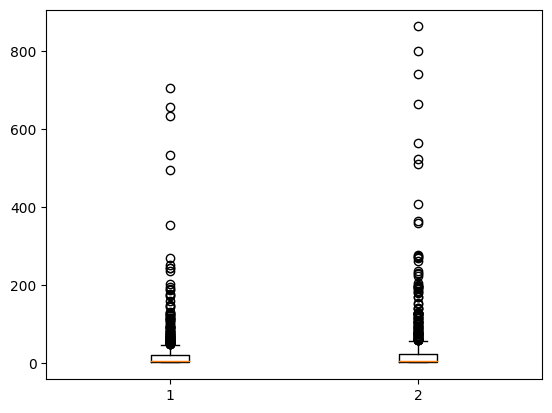

In [12]:
# menampilkan plot data outlier
plt.boxplot(df[['Jumlah Transaksi', 'Volume Penjualan']])
plt.show()

In [13]:
#Hapus outlier
data = df[(df['Volume Penjualan'] >= lower_bound_var1) & (df['Volume Penjualan'] <= upper_bound_var1) &
          (df['Jumlah Transaksi'] >= lower_bound_var2) & (df['Jumlah Transaksi'] <= upper_bound_var2) &
          (df['Rata Rata'] >= lower_bound_var3) & (df['Rata Rata'] <= upper_bound_var3)]

In [14]:
# data sebelum dihapus outliernya
df.shape

(921, 4)

In [15]:
# data sesudah dihapus outliernya
data.shape

(729, 4)

## **5. Transformasi Data (normalisasi data)**



Standard Scaler merupakan metode preprocessing di mana metode tersebut akan melakukan standarisasi fitur dengan menghapus rata-rata dan menskalakan unit varian

In [16]:
# StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# **Tahap Pemodelan**

## **1. Penentuan K dengan Elbow**

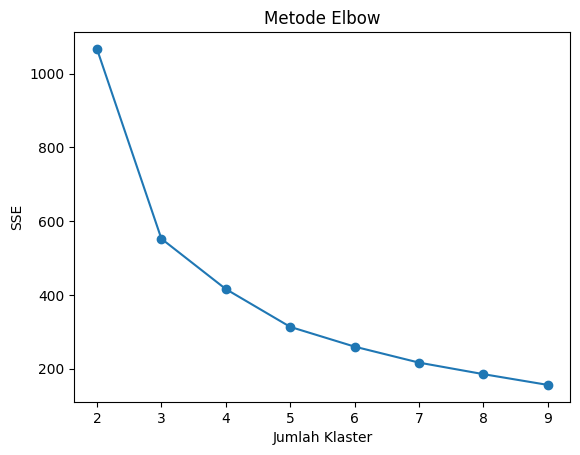

Jumlah klaster optimal: 3
Nilai inersia pada titik elbow: 552.2623278535099


In [17]:
# Inisiasi array SSE
sse = []

# Menghitung nilai inersia untuk setiap jumlah klaster dari 2 hingga 10 cluster
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

# Menampilkan grafik elbow
plt.plot(range(2, 10), sse, marker='o')
plt.xlabel('Jumlah Klaster')
plt.ylabel('SSE')
plt.title('Metode Elbow')
plt.show()

# Menampilkan nilai hasil cluster yang optimal
desired_clusters = 3
elbow_index = desired_clusters - 2
elbow_value = sse[elbow_index]

# Menampilkan jumlah klaster optimal dan nilai inersia pada titik elbow
print("Jumlah klaster optimal:", desired_clusters)
print("Nilai inersia pada titik elbow:", elbow_value)


In [18]:
# Menampilkan nilai elbow untuk setiap jumlah klaster
for i, sse_value in enumerate(sse):
    print("Jumlah klaster:", i + 2, " - Nilai SSE:", sse_value)

Jumlah klaster: 2  - Nilai SSE: 1067.3121108060038
Jumlah klaster: 3  - Nilai SSE: 552.2623278535099
Jumlah klaster: 4  - Nilai SSE: 415.6390702100582
Jumlah klaster: 5  - Nilai SSE: 312.9798700220889
Jumlah klaster: 6  - Nilai SSE: 259.3660995943541
Jumlah klaster: 7  - Nilai SSE: 215.9655223540172
Jumlah klaster: 8  - Nilai SSE: 184.65683299297157
Jumlah klaster: 9  - Nilai SSE: 155.45068137126947


## 2.Implementasi Kmeans 

In [19]:
# Menginisialisasi KMeans dengan jumlah cluster k
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Melakukan clustering pada data
kmeans.fit(scaled_data)

# Menampilkan centroid dan label cluster
print(kmeans.cluster_centers_)
print(kmeans.labels_)


[[ 1.29351356 -0.34225378 -0.3526506   0.        ]
 [-0.62938173 -0.40893671 -0.40331153  0.        ]
 [-0.34721987  1.95254607  1.95350548  0.        ]]
[2 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 2 2 2 2 2 1 1 1 2 2 2 1 2 2 2 1 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 2 1 1 1 2 2 2 2 2 1 1 1
 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 1 2 2 1 1 1 1 1 1 1 1 2 1 2 2 2 1 2 2
 1 2 1 2 1 1 1 1 1 1 2 1 1 1 2 1 1 2 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 2 1 1 1 2 1 1 1 2 2 2 2 2 2 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 2 2 1 1 1 2 2 2 1 2 2 2 2 2
 1 1 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 2 1 1 1 1 1 1 1 1 2 2 2 1 1
 1 2 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 

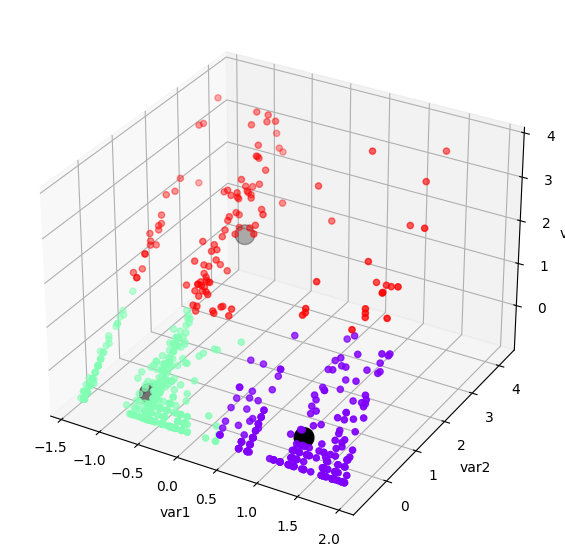

In [20]:
# Visualisasi hasil Cluster
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d') 
ax.scatter(scaled_data[:, 0], scaled_data[:, 1], scaled_data[:, 2], c=kmeans.labels_, cmap='rainbow')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=200, color='black')
ax.set_xlabel('var1')
ax.set_ylabel('var2')
ax.set_zlabel('var3')
plt.show()

In [21]:
# Menambahkan kolom Kluster untuk label cluster
data.loc[:, "Kluster"] = kmeans.labels_

# Membuat variabel untuk menampilkan kolom nama produk dan variasi
for idx, row in data.iterrows():
    nomor_produk = row['Nomor Produk']
    nama = df_raw[df_raw['Nomor Produk'] == nomor_produk]
    nama_produk = nama['Nama Produk'].iloc[0]
    variasi = nama['Variasi'].iloc[0]
    data.loc[idx, 'Nama Produk'] = nama_produk
    data.loc[idx, 'Variasi'] = variasi

# Menampilkan data dengan kolom kluster, nama produk, dan variasi
print(data[['Kluster', 'Nama Produk', 'Variasi']])


<ipython-input-21-817e7ca3e614>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, "Kluster"] = kmeans.labels_
<ipython-input-21-817e7ca3e614>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[idx, 'Nama Produk'] = nama_produk
<ipython-input-21-817e7ca3e614>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

     Kluster                                        Nama Produk  \
0          2           Paket Wajah Ms Glow BARCODE (TANPA GIFT)   
1          1           Paket Wajah Ms Glow BARCODE (TANPA GIFT)   
2          1           Paket Wajah Ms Glow BARCODE (TANPA GIFT)   
3          2           Paket Wajah Ms Glow BARCODE (TANPA GIFT)   
4          1                                   Loose Powder You   
..       ...                                                ...   
916        0        [Produk hasil nyata] PAKET WAJAH CAN BEAUTY   
917        0     [Paket isi 3] Angel Tacik lotion ORIGINAL 100%   
918        0        [Produk hasil nyata] PAKET WAJAH CAN BEAUTY   
919        0  [ TANPA TONER ] PAKET WAJAH MS GLOW (FREE TOTE...   
920        0        [Produk hasil nyata] PAKET WAJAH CAN BEAUTY   

                         Variasi  
0                Paket Whitening  
1                 Paket Luminous  
2                 Paket Ultimate  
3                     Paket Acne  
4                   

In [22]:
# hasil kolom-kolom yang dibuat
data.columns

Index(['Nomor Produk', 'Volume Penjualan', 'Jumlah Transaksi', 'Rata Rata',
       'Kluster', 'Nama Produk', 'Variasi'],
      dtype='object')

In [23]:
# menampikan data
data

,Nomor Produk,Volume Penjualan,Jumlah Transaksi,Rata Rata,Kluster,Nama Produk,Variasi
0,1729383505215391564,32,32,1,2,Paket Wajah Ms Glow BARCODE (TANPA GIFT),Paket Whitening
1,1729383505215457100,11,10,1,1,Paket Wajah Ms Glow BARCODE (TANPA GIFT),Paket Luminous
2,1729383505215522636,4,4,1,1,Paket Wajah Ms Glow BARCODE (TANPA GIFT),Paket Ultimate
3,1729383505215588172,26,26,1,2,Paket Wajah Ms Glow BARCODE (TANPA GIFT),Paket Acne
4,1729383514305627980,2,2,1,1,Loose Powder You,Natural
...,...,...,...,...,...,...,...
916,1729576173693668172,1,1,1,0,[Produk hasil nyata] PAKET WAJAH CAN BEAUTY,Serum Purifying/Acne
917,1729577164510956364,2,2,1,0,[Paket isi 3] Angel Tacik lotion ORIGINAL 100%,-
918,1729577227370793804,1,1,1,0,[Produk hasil nyata] PAKET WAJAH CAN BEAUTY,ECER malam acne can beauty
919,1729577388495040000,1,1,1,0,[ TANPA TONER ] PAKET WAJAH MS GLOW (FREE TOTE...,"Paket Acne, TANPA DAY CREAM"


# **Tahap Evaluasi**

In [24]:

def calculate_cluster_centers(X, labels):
    cluster_centers = []
    unique_labels = np.unique(labels)
    for label in unique_labels:
        cluster_centers.append(np.mean(X[labels == label], axis=0))
    return np.array(cluster_centers)

def calculate_intra_cluster_distance(X, labels, cluster_centers):
    num_clusters = len(cluster_centers)
    intra_cluster_distances = []
    for i in range(num_clusters):
        cluster_center = cluster_centers[i]
        cluster_points = X[labels == i]
        distances = pairwise_distances(cluster_points, [cluster_center])
        intra_cluster_distances.append(np.mean(distances))
    return np.array(intra_cluster_distances)

def calculate_inter_cluster_distance(cluster_centers):
    num_clusters = len(cluster_centers)
    inter_cluster_distances = pairwise_distances(cluster_centers)
    np.fill_diagonal(inter_cluster_distances, np.inf)  # Set diagonal values to infinity
    return np.min(inter_cluster_distances, axis=1)

def calculate_davies_bouldin_index(X, labels):
    cluster_centers = calculate_cluster_centers(X, labels)
    intra_cluster_distances = calculate_intra_cluster_distance(X, labels, cluster_centers)
    inter_cluster_distances = calculate_inter_cluster_distance(cluster_centers)
    dbi = np.mean((intra_cluster_distances + inter_cluster_distances) / intra_cluster_distances)
    return dbi

# Data hasil klasterisasi
X = scaled_data
labels = kmeans.labels_

# memeriksa indeks Davies-Bouldin untuk hasil di atas:
db_index = davies_bouldin_score(scaled_data, labels)
print(db_index)

0.6333504168920968


In [25]:
results = {}
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=30, n_init=10)
    kmeans.fit(scaled_data)
    labels = kmeans.labels_
    db_index = davies_bouldin_score(scaled_data, labels)
    results[i] = db_index

print("Davies-Bouldin Index for different number of clusters:")
for k, v in results.items():
    print("Number of Clusters:", k, "- DBI:", v)

Davies-Bouldin Index for different number of clusters:
Number of Clusters: 2 - DBI: 0.737894102479764
Number of Clusters: 3 - DBI: 0.6333504168920968
Number of Clusters: 4 - DBI: 0.7205258282707007
Number of Clusters: 5 - DBI: 0.6766154044014966
Number of Clusters: 6 - DBI: 0.7193743661668627
Number of Clusters: 7 - DBI: 0.6468373383700349
Number of Clusters: 8 - DBI: 0.6587531865962108
Number of Clusters: 9 - DBI: 0.6534751660375385
